<a href="https://colab.research.google.com/github/JUNGBORAM/jejumaster/blob/main/5%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5(%EA%B8%B0%EC%83%81%EC%B2%AD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적데이터분석

## 4. 공공 데이터 분석-기상청날씨

---

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

## 기상청 데이터 분석(종관데이터)

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기 <br>
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 0. **데이터 준비하기**: 기상청 사이트에서 파일 다운로드하기
 1. **데이터 불러오기** : 파이썬으로 데이터 읽어서 표로 나타내기
 2. **데이터 전처리하기** : 필요한 데이터만 추출하기
 3. **데이터 시각화하기** : 데이터 그래프로 나타내기
 4. **데이터 저장하기** :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [1]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.5.3
1.23.5
3.7.1


---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


In [20]:
PATH = './sample_data/'
FILE = 'weather_data.csv'

---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [21]:
import pandas as pd

file = PATH+FILE
df = pd.read_csv(file, encoding='CP949')

print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1994-01,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9
1,90,속초,1994-02,1.7,12.1,-10.6,1015.6,63.0,43.4,2.8,166.4,28.5


---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [5]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30266 entries, 0 to 30265
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  30266 non-null  int64  
 1   지점명                 30266 non-null  object 
 2   일시                  30266 non-null  object 
 3   평균기온(°C)            30237 non-null  float64
 4   최고기온(°C)            30266 non-null  float64
 5   최저기온(°C)            30266 non-null  float64
 6   평균현지기압(hPa)         30236 non-null  float64
 7   평균상대습도(%)           30233 non-null  float64
 8   월합강수량(00~24h만)(mm)  30231 non-null  float64
 9   평균풍속(m/s)           30230 non-null  float64
 10  합계 일조시간(hr)         30189 non-null  float64
 11  최심적설(cm)            5106 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 2.8+ MB


#### # 기술통계 정보

In [22]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,30266.000000,30237.000000,30266.000000,30266.000000,30236.000000,30233.000000,30231.000000,30230.000000,30189.000000,5106.000000
mean,194.558944,12.963637,24.754199,2.315588,1003.553307,68.367578,113.342539,2.128091,183.901239,7.573580
std,63.739606,9.182088,8.012612,10.852625,16.771759,10.498236,128.249366,1.136370,44.226168,11.904483
min,90.000000,-11.500000,0.200000,-29.200000,911.900000,32.000000,0.000000,-0.400000,0.000000,0.000000
25%,136.000000,5.000000,18.300000,-6.300000,998.800000,61.000000,29.300000,1.400000,155.300000,1.500000
50%,192.000000,13.600000,26.400000,1.600000,1006.500000,69.000000,67.900000,1.800000,184.600000,4.200000
75%,255.000000,21.300000,31.500000,11.800000,1014.200000,76.000000,149.900000,2.600000,213.100000,8.800000
max,295.000000,30.200000,41.000000,24.800000,1027.700000,99.000000,1244.500000,13.800000,407.600000,165.700000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [23]:
!pip install missingno

- **행에 결측 데이터 시각화**

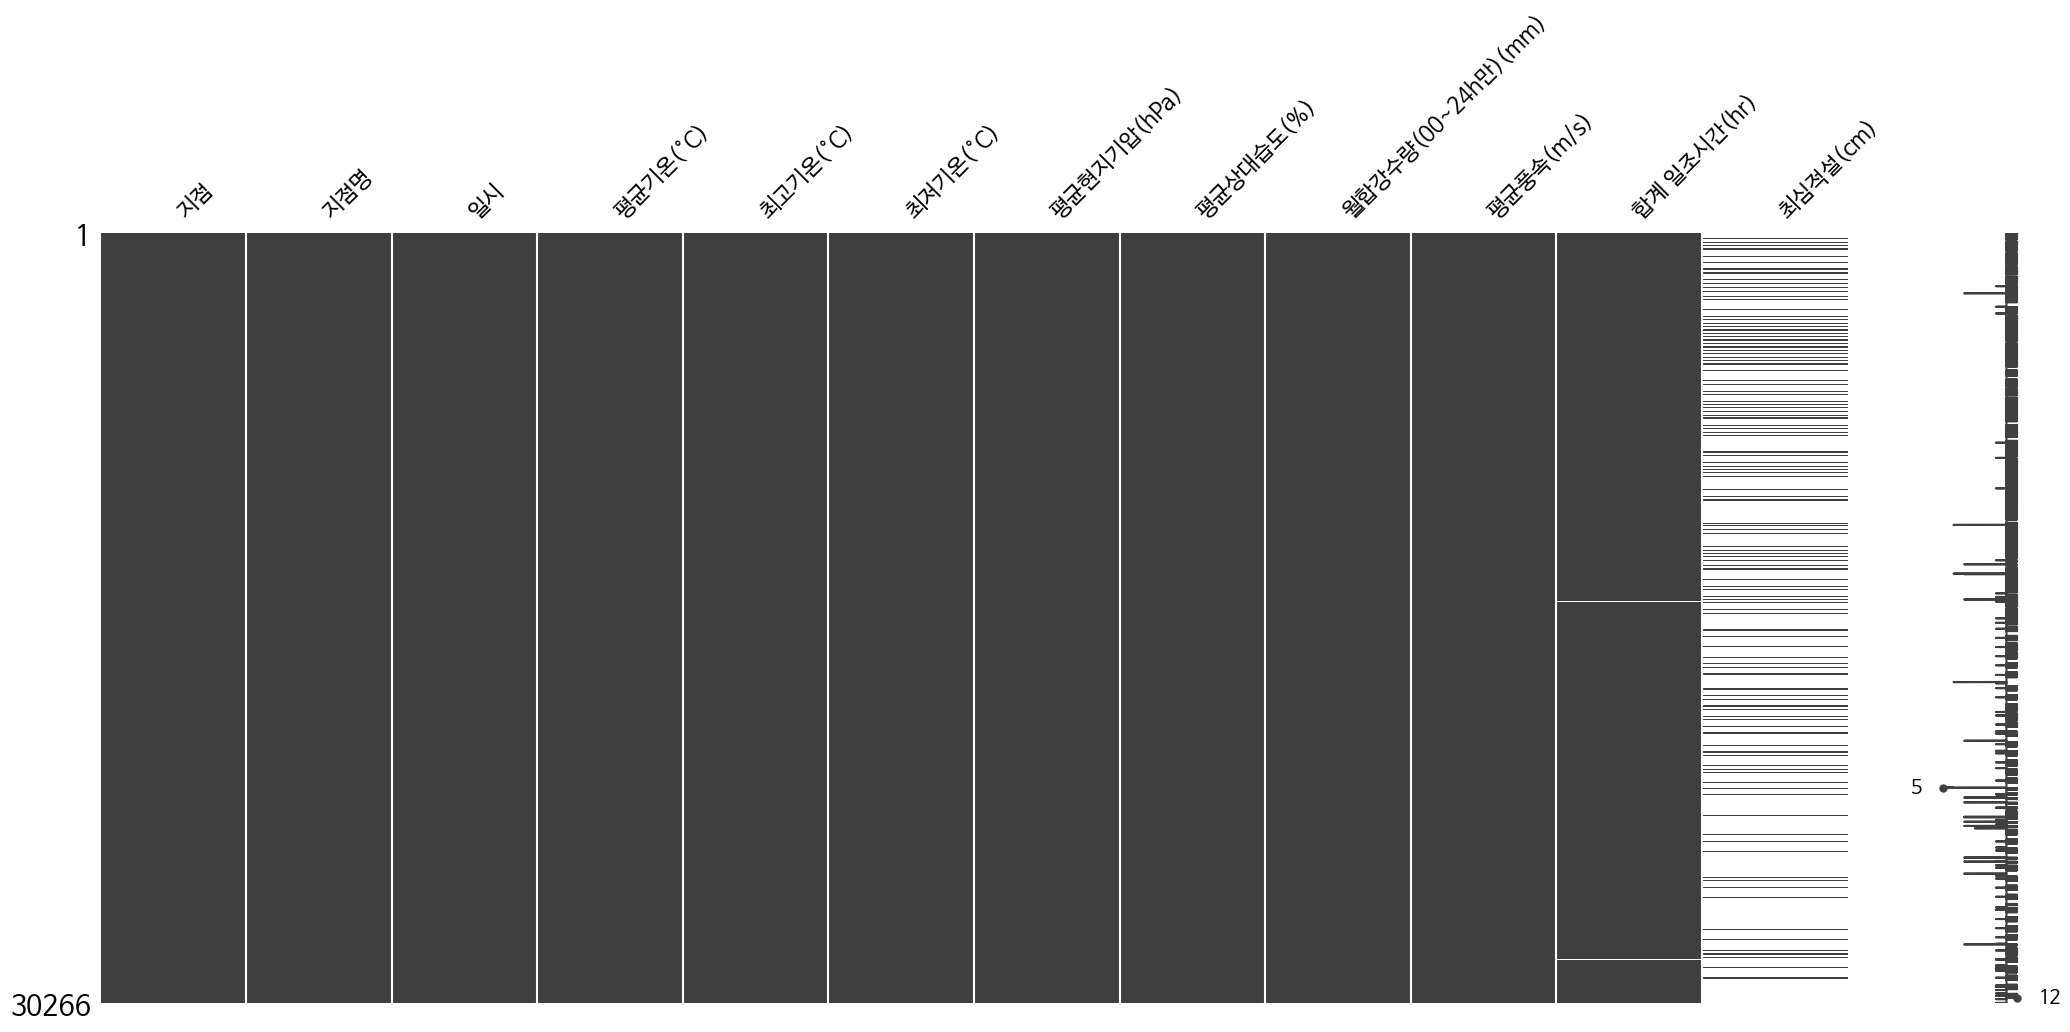

In [24]:
import missingno as msno
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트

msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

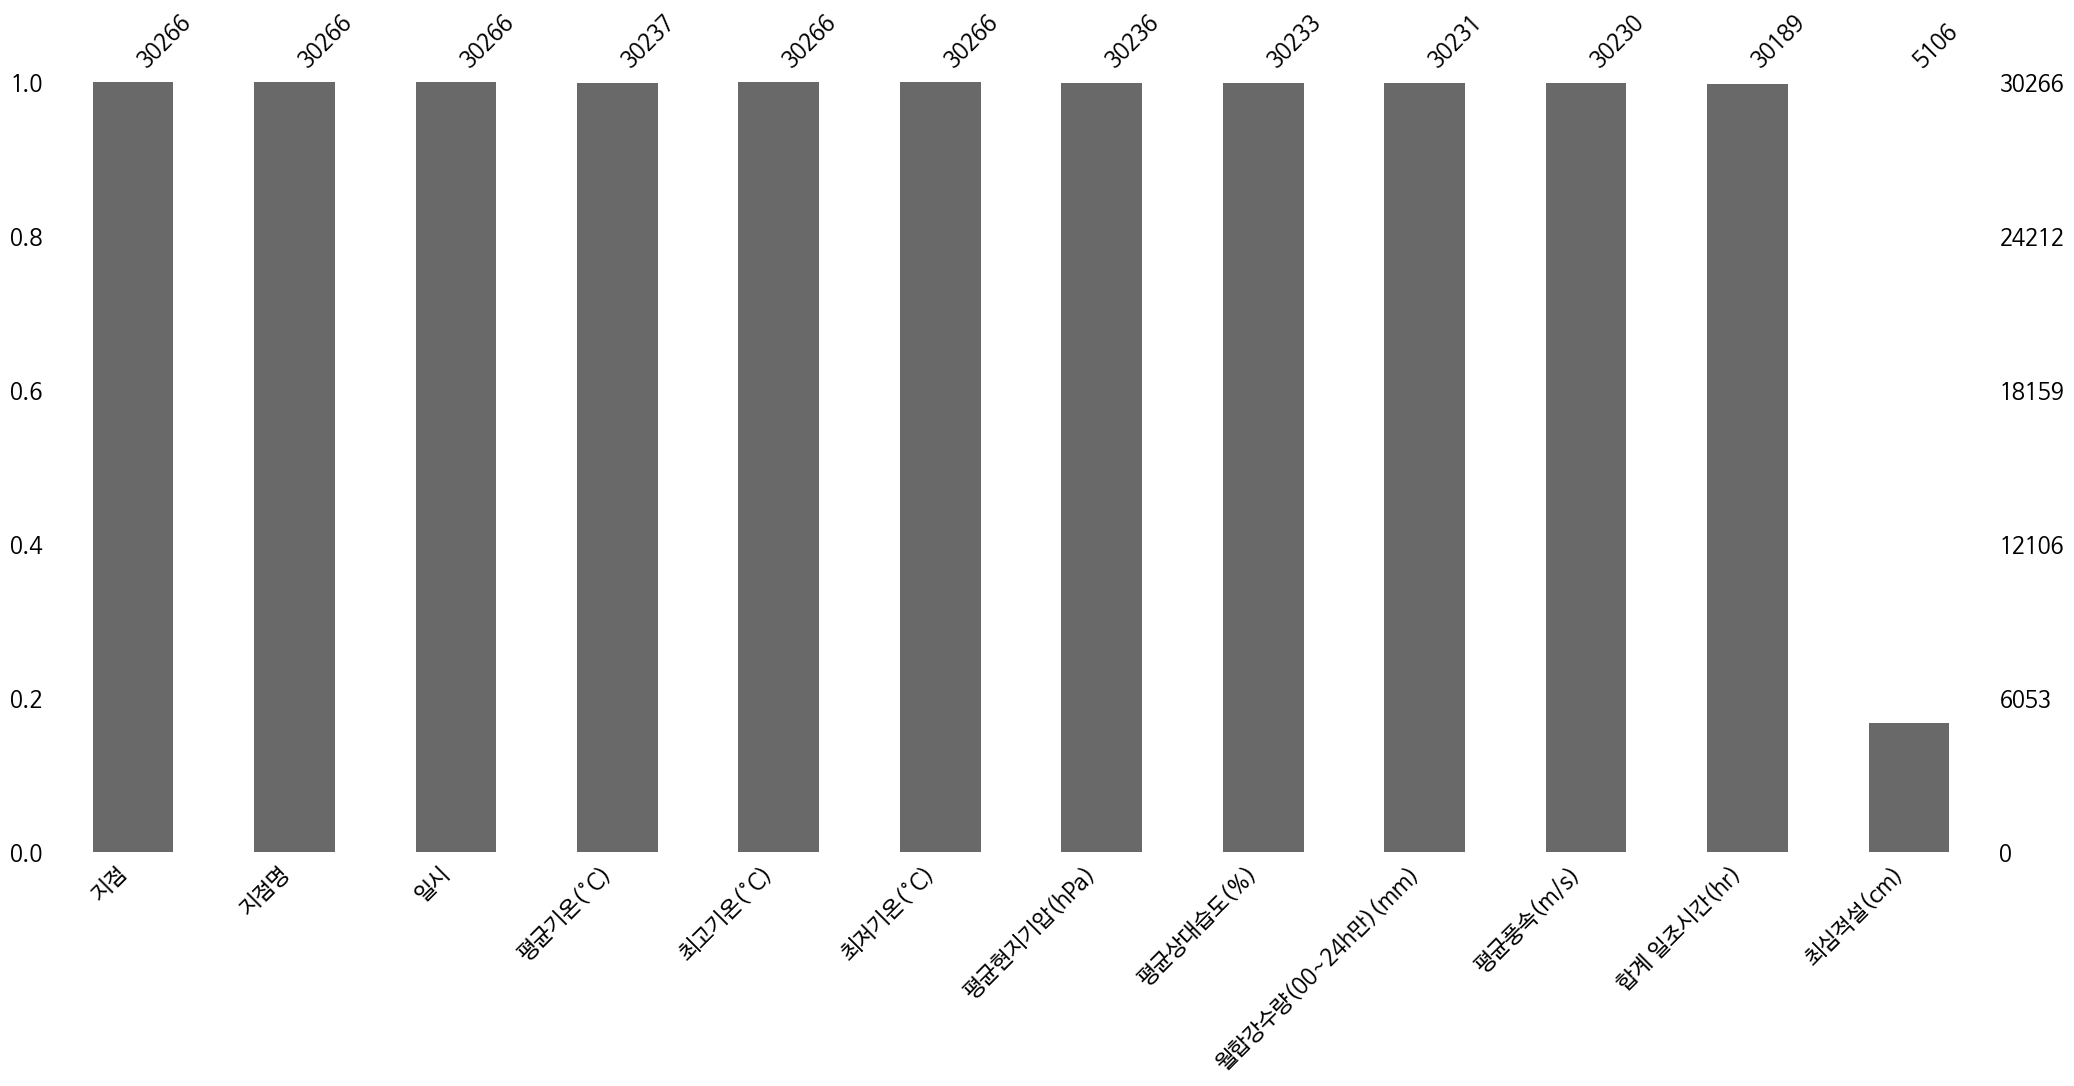

In [25]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [26]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head(3)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9
1,90,속초,1994-02,1.7,12.1,-10.6,1015.6,63.0,43.4,2.8,166.4,28.5
2,90,속초,1994-03,4.6,14.8,-5.6,1017.2,62.0,4.2,3.4,219.1,NaN


In [27]:

df[df.지점명.isnull()]


,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


In [28]:
df[df.평균기온.isnull()]

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
2368,104,북강릉,2008-07,NaN,33.7,19.5,NaN,NaN,268.0,NaN,31.4,NaN
11473,164,무안,2000-08,NaN,30.1,21.1,NaN,NaN,NaN,NaN,10.7,NaN
13021,172,고창,2023-07,NaN,34.2,21.3,NaN,NaN,377.0,NaN,72.3,NaN
13387,175,진도(첨찰산),2019-08,NaN,32.6,21.7,NaN,NaN,NaN,NaN,48.6,NaN
13408,176,대구(기),2015-06,NaN,33.2,12.4,NaN,NaN,4.1,NaN,74.3,NaN
14403,187,성산,2008-09,NaN,27.5,20.1,NaN,NaN,2.6,NaN,20.9,NaN
17650,217,정선군,2010-08,NaN,30.5,19.6,NaN,NaN,103.0,NaN,NaN,NaN
19957,239,세종,2019-05,NaN,24.1,13.7,NaN,NaN,0.2,NaN,7.6,NaN
21801,251,고창군,2007-05,NaN,29.3,8.9,NaN,NaN,NaN,NaN,NaN,NaN
21802,251,고창군,2007-06,NaN,32.9,14.2,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [29]:
df.head(1)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9


In [30]:
#df.insert(인덱스위치, 컬럼명, 값)
df.insert(3,'신규',df['지점'])
df.head(1)

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,90,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9


In [31]:
df.insert(3,'검색일자',df['일시'])

In [32]:
df.head(3)

,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,1994-01,90,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9
1,90,속초,1994-02,1994-02,90,1.7,12.1,-10.6,1015.6,63.0,43.4,2.8,166.4,28.5
2,90,속초,1994-03,1994-03,90,4.6,14.8,-5.6,1017.2,62.0,4.2,3.4,219.1,NaN


- **문자열이 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [33]:
df['검색일자']= df['검색일자'].str.replace(pat=r'-',repl=r'',regex=True)
df.head(1)

,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,199401,90,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [34]:
df['검색일자'] = df['검색일자'].apply('int64')
df.dtypes

지점          int64
지점명        object
일시         object
검색일자        int64
신규          int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [35]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

지점          int64
지점명        object
일시         object
검색일자       object
신규          int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

In [36]:
# 년월 추가
df.insert(3,'년도',df['일시'].str[0:4])
df

,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,1994,199401,90,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9
1,90,속초,1994-02,1994,199402,90,1.7,12.1,-10.6,1015.6,63.0,43.4,2.8,166.4,28.5
2,90,속초,1994-03,1994,199403,90,4.6,14.8,-5.6,1017.2,62.0,4.2,3.4,219.1,NaN
3,90,속초,1994-04,1994,199404,90,11.8,23.5,1.0,1011.5,70.0,25.3,3.2,213.6,NaN
4,90,속초,1994-05,1994,199405,90,17.2,29.9,7.2,1004.7,64.0,94.8,3.5,230.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30261,295,남해,2023-06,2023,202306,295,22.5,30.6,15.8,1002.4,78.0,364.9,1.2,192.6,NaN
30262,295,남해,2023-07,2023,202307,295,25.4,33.5,20.2,1003.5,88.0,709.8,1.1,99.8,NaN
30263,295,남해,2023-08,2023,202308,295,27.1,35.1,22.4,1000.2,82.0,404.2,NaN,206.7,NaN
30264,295,남해,2023-09,2023,202309,295,23.8,31.1,17.1,1007.3,82.0,280.9,1.4,148.8,NaN


#### 4. 컬럼 삭제

In [37]:
df.drop('신규', axis=1, inplace=True)
df.drop('검색일자', axis=1, inplace=True)
df.head(3)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,1994,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9
1,90,속초,1994-02,1994,1.7,12.1,-10.6,1015.6,63.0,43.4,2.8,166.4,28.5
2,90,속초,1994-03,1994,4.6,14.8,-5.6,1017.2,62.0,4.2,3.4,219.1,NaN


#### 5. 특정 조건 검색

In [38]:
print( '#지점명 개수: ', len( set(df['지점명']) ) )
print( '#지점명: ', set( df['지점명'] ) )

#지점명 개수:  102
#지점명:  {'북춘천', '의성', '홍성', '홍천', '삼척', '성산', '춘천', '영주', '흑산도', '포항', '강화', '장수', '남해', '거제', '울진', '봉화', '고창', '울산', '동해', '군산', '백령도', '상주', '순창군', '통영', '고흥', '고산', '진주', '보령', '경주시', '광주', '인제', '충주', '영광군', '임실', '의령군', '서산', '제주', '남원', '제천', '영월', '정선군', '속초', '대전', '대구', '청송군', '보성군', '양산시', '진도(첨찰산)', '고창군', '영천', '안동', '보은', '문경', '여수', '강릉', '북창원', '북강릉', '함양군', '합천', '성산포', '해남', '청주', '태백', '천안', '세종', '서귀포', '부산', '금산', '영덕', '강진군', '거창', '전주', '서울', '수원', '이천', '파주', '무안', '부여', '대관령', '장흥', '구미', '창원', '원주', '대구(기)', '완도', '밀양', '산청', '광양시', '동두천', '인천', '순천', '목포', '양평', '철원', '서청주', '울릉도', '부안', '진도군', '정읍', '김해시', '추풍령', '주암'}


In [40]:
df_2023 = df.query(" 년도 == '2023' ")
df_2023.head(1)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
348,90,속초,2023-01,2023,0.2,15.1,-16.0,1019.9,45.0,94.7,2.0,215.7,NaN


In [41]:
print( '#지점명 개수: ', len( set(df_2023['지점명']) ) )
print( '#지점명: ', set( df_2023['지점명'] ) )

#지점명 개수:  96
#지점명:  {'북춘천', '의성', '홍성', '홍천', '성산', '춘천', '영주', '흑산도', '포항', '강화', '장수', '남해', '거제', '울진', '봉화', '고창', '울산', '동해', '군산', '백령도', '상주', '순창군', '통영', '고흥', '고산', '진주', '보령', '경주시', '광주', '인제', '충주', '영광군', '임실', '의령군', '서산', '제주', '남원', '제천', '영월', '정선군', '속초', '대전', '대구', '청송군', '보성군', '양산시', '고창군', '영천', '안동', '보은', '문경', '여수', '강릉', '북창원', '북강릉', '함양군', '합천', '해남', '청주', '태백', '천안', '세종', '서귀포', '부산', '금산', '영덕', '강진군', '거창', '전주', '서울', '수원', '이천', '파주', '부여', '대관령', '장흥', '구미', '창원', '원주', '완도', '밀양', '산청', '광양시', '동두천', '인천', '순천', '목포', '양평', '철원', '서청주', '울릉도', '부안', '진도군', '정읍', '김해시', '추풍령'}


In [ ]:
# 전체 저점에 있으나 2023 지점에는 없는 데이터?
df_지점명 = list( set(df['지점명']) )
de_2023_지점명 = list(set(df_2023['지점명'] ) )



- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [42]:
# df[df.지점명 == '제주' ]

df.query(" 지점명 == '제주' ")

# df.iloc[ df.index[ df['지점명'] == '제주' ] ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13511,184,제주,1994-01,1994,6.0,15.3,-0.6,1020.3,66.0,37.5,3.8,80.9,5.3
13512,184,제주,1994-02,1994,6.7,14.3,0.8,1017.6,66.0,46.0,4.2,110.3,NaN
13513,184,제주,1994-03,1994,7.9,17.4,0.7,1020.1,61.0,43.5,3.8,176.0,NaN
13514,184,제주,1994-04,1994,15.1,26.4,7.4,1012.1,72.0,106.5,3.5,169.2,NaN
13515,184,제주,1994-05,1994,18.8,29.0,10.0,1007.3,67.0,24.8,3.0,208.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13864,184,제주,2023-06,2023,23.4,31.4,15.8,1005.6,76.0,213.0,3.1,170.2,NaN
13865,184,제주,2023-07,2023,28.1,37.3,21.8,1005.6,75.0,273.2,3.0,124.6,NaN
13866,184,제주,2023-08,2023,28.8,34.8,21.6,1002.5,73.0,182.5,3.1,242.9,NaN
13867,184,제주,2023-09,2023,25.5,33.3,18.2,1009.6,71.0,84.5,2.8,182.6,NaN


- **또는(|) , 포함(in)** 조건 사용: 제주 또는 서귀포 데이터 추출

In [43]:
# 또는(|) 사용
df_jeju = df.query(" 지점명=='제주' | 지점명=='서귀포' ")   #방법1
df_jeju.head()

df.query(" 지점명=='제주' | 지점명=='서귀포' ").head(2)   #방법2
df.query(" 지점명 in ('제주','서귀포') ").head(2)         #방법3

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13511,184,제주,1994-01,1994,6.0,15.3,-0.6,1020.3,66.0,37.5,3.8,80.9,5.3
13512,184,제주,1994-02,1994,6.7,14.3,0.8,1017.6,66.0,46.0,4.2,110.3,NaN


- **그리고(&)** 조건 사용

In [45]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >30) ] #방법1

df.query(" 지점명=='제주' & 최고기온 > 30 ")    #방법2

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13516,184,제주,1994-06,1994,21.0,34.5,15.4,1005.9,77.0,342.3,2.9,184.5,NaN
13517,184,제주,1994-07,1994,28.4,34.6,24.1,1004.3,79.0,72.3,2.5,323.7,NaN
13518,184,제주,1994-08,1994,27.9,33.7,21.1,1006.3,79.0,365.3,3.3,259.3,NaN
13519,184,제주,1994-09,1994,23.0,30.6,15.6,1009.5,65.0,94.0,2.7,256.3,NaN
13529,184,제주,1995-07,1995,25.9,34.5,19.0,1005.7,83.0,413.2,2.8,224.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13856,184,제주,2022-10,2022,18.4,30.6,11.5,1019.3,69.0,22.1,3.5,187.0,NaN
13864,184,제주,2023-06,2023,23.4,31.4,15.8,1005.6,76.0,213.0,3.1,170.2,NaN
13865,184,제주,2023-07,2023,28.1,37.3,21.8,1005.6,75.0,273.2,3.0,124.6,NaN
13866,184,제주,2023-08,2023,28.8,34.8,21.6,1002.5,73.0,182.5,3.1,242.9,NaN


### [실습문제] 기상관측 데이터에서 특징 데이터 찾기
- 기상관측 지점이 제주인 데이터
- 가장 더웠던 년도, 월, 기온은?
- 가장 추웠던 년도, 월, 기온은?

In [46]:
# 포함(in) 사용
df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13511,184,제주,1994-01,1994,6.0,15.3,-0.6,1020.3,66.0,37.5,3.8,80.9,5.3
13512,184,제주,1994-02,1994,6.7,14.3,0.8,1017.6,66.0,46.0,4.2,110.3,NaN
13513,184,제주,1994-03,1994,7.9,17.4,0.7,1020.1,61.0,43.5,3.8,176.0,NaN
13514,184,제주,1994-04,1994,15.1,26.4,7.4,1012.1,72.0,106.5,3.5,169.2,NaN
13515,184,제주,1994-05,1994,18.8,29.0,10.0,1007.3,67.0,24.8,3.0,208.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25024,265,성산포,2006-11,2006,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
25025,265,성산포,2006-12,2006,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
25026,265,성산포,2007-01,2007,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
25027,265,성산포,2007-02,2007,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **min()** : 최초 측정월, 마지막 측정월

In [48]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() )
print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
df['일시'].min()
df.query(" 일시 == '1904-04'")     #방법1

df.query(f" 일시 == '{ df['일시'].min() }' ")   #방법2

df[ df['일시'] == df['일시'].min() ]    #방법3

최초 측정일시:  1994-01
최초 측정일시:  1994-01
최근 측정일시:  2023-10
최근 측정일시:  2023-10


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1994-01,1994,0.5,11.9,-9.8,1018.4,61.0,71.7,3.0,153.3,22.9
443,95,철원,1994-01,1994,-4.2,8.5,-18.7,1001.8,70.0,10.8,1.4,133.4,3.8
1373,100,대관령,1994-01,1994,-7.0,5.0,-19.2,918.6,69.0,56.1,5.1,176.5,31.3
1731,101,춘천,1994-01,1994,-2.8,9.4,-15.9,1013.3,71.0,10.2,1.0,160.3,1.7
2552,105,강릉,1994-01,1994,0.8,13.1,-9.2,1018.0,60.0,88.9,2.7,157.2,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28476,285,합천,1994-01,1994,-0.6,11.7,-13.7,1018.7,54.0,19.4,1.1,181.1,1.4
28834,288,밀양,1994-01,1994,0.2,13.1,-13.5,1021.1,73.0,21.5,1.2,192.2,0.4
29192,289,산청,1994-01,1994,-0.2,12.4,-14.1,1006.0,62.0,22.5,1.6,192.9,2.5
29550,294,거제,1994-01,1994,2.1,11.6,-8.9,1019.5,60.0,46.0,1.5,175.2,1.5


- **max()** : 최근 측정 월 검색

In [49]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
357,90,속초,2023-10,2023,16.5,25.5,6.3,1015.1,59.0,31.4,1.8,187.6,NaN
442,93,북춘천,2023-10,2023,12.6,23.5,-0.2,1007.7,82.0,25.9,0.9,173.7,NaN
800,95,철원,2023-10,2023,12.6,22.8,-0.4,1000.7,79.0,30.5,0.9,197.9,NaN
1110,98,동두천,2023-10,2023,13.7,23.6,1.5,1004.9,77.0,38.5,0.8,174.1,NaN
1372,99,파주,2023-10,2023,13.1,24.0,-0.5,1015.6,83.0,46.5,1.0,173.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28833,285,합천,2023-10,2023,15.4,25.9,3.7,1014.9,71.0,6.3,0.6,187.1,NaN
29191,288,밀양,2023-10,2023,15.8,25.4,4.3,1016.7,66.0,9.2,0.7,198.3,NaN
29549,289,산청,2023-10,2023,14.7,26.1,3.8,1002.9,74.0,8.0,1.3,179.1,NaN
29907,294,거제,2023-10,2023,16.8,24.4,7.1,1012.9,69.0,4.2,1.1,178.4,NaN


In [50]:
df.query(f" 지점명 == '제주' & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13868,184,제주,2023-10,2023,19.7,26.1,13.3,1016.1,60.0,36.0,3.1,190.1,NaN


In [52]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13868,184,제주,2023-10,2023,19.7,26.1,13.3,1016.1,60.0,36.0,3.1,190.1,NaN
14226,185,고산,2023-10,2023,19.2,25.7,14.3,1009.8,64.0,2.8,5.9,194.7,NaN
14761,188,성산,2023-10,2023,18.6,26.5,10.7,1016.1,68.0,40.5,2.5,177.3,NaN
15119,189,서귀포,2023-10,2023,20.1,26.3,13.6,1012.1,59.0,5.9,1.7,214.4,NaN


In [54]:
#제주에서 처음 기상 측정한 년월은?
df_jeju = df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].min() }' ")
print(f"제주에서 최초 측정일 : {df_jeju['일시'].min()}")

#제주에서 처음 기상 측정한 데이터 목록
df_jeju.query(f" 일시 == '{df_jeju['일시'].min()}'")

제주에서 최초 측정일 : 1994-01


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13511,184,제주,1994-01,1994,6.0,15.3,-0.6,1020.3,66.0,37.5,3.8,80.9,5.3
13869,185,고산,1994-01,1994,6.5,14.9,-0.3,1012.8,69.0,37.5,9.5,107.1,NaN
14227,187,성산,1994-01,1994,5.2,16.1,-3.5,1020.4,69.0,69.8,2.5,111.3,16.8
14404,188,성산,1994-01,1994,5.2,16.1,-3.5,1020.4,69.0,69.8,2.5,111.3,16.8
14762,189,서귀포,1994-01,1994,7.2,16.3,-0.2,1014.8,61.0,55.3,2.4,166.3,4.8
24870,265,성산포,1994-01,1994,5.2,16.1,-3.5,1020.4,69.0,69.8,2.5,111.3,16.8


### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [55]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()


# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
17205,212,홍천,2018-08,2018,27.2,41.0,15.8,991.7,73.0,300.6,1.4,234.4,NaN


In [56]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?
17205    2018
Name: 일시, dtype: object
기상관측 데이터를 통해 가장 더웠던 년-월: 17205    2018-08
Name: 일시, dtype: object


17205    41.0
Name: 최고기온, dtype: float64

In [57]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

37.5

### [실습]: 가장 추웠던 날짜와 온도는?

In [58]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()

-6.9

###  [실습] : '제주'에서 가장 더웠던 날짜와 기온?

In [59]:
wmax = df.query(" 지점명 == '제주' ")['최고기온'].max()
print(wmax)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최고기온 >= { wmax }")


wmax = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최고기온 >= { wmax }")

37.5


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
13854,184,제주,2022-08,2022,29.2,37.5,21.2,1005.8,75.0,124.3,3.1,232.4,NaN


In [60]:
# 서울에서 가장 더웠던 년도와 기온
wmax = df.query(" 지점명 in ('관악산','서울') ")['최고기온'].max()
df.query(f" 지점명 in ('관악산','서울') and 최고기온 >= { wmax }")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
3563,108,서울,2018-08,2018,28.8,39.6,20.2,997.4,65.0,202.6,1.7,232.5,NaN


###  [실습] : '제주'에서 가장 추웠던 날짜와 기온은?

In [61]:
wmin = df.query(" 지점명 == '제주' ")['최저기온'].min()
print(wmin)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최저기온 <= { wmin  } ")

wmin = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최저기온 <= { wmin  } ")

-5.8


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
14668,188,성산,2016-01,2016,5.0,17.5,-6.9,1021.7,71.0,167.8,3.1,99.3,NaN


In [62]:
# 서울에서 가장 추웠던 년도와 기온
wmin = df.query(" 지점명 in ('관악산','서울') ")['최저기온'].min()
df.query(f" 지점명 in ('관악산','서울') and 최저기온 <= { wmin  } ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
3352,108,서울,2001-01,2001,-4.1,6.8,-18.6,1012.9,62.0,39.4,2.2,97.0,15.6
3592,108,서울,2021-01,2021,-2.4,13.9,-18.6,1013.9,58.0,18.9,2.5,176.4,5.1


--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [63]:
df.groupby(['지점명'], as_index=False).mean()
df.groupby('지점명').mean()

<ipython-input-63-5011cd9e8b27>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['지점명'], as_index=False).mean()
<ipython-input-63-5011cd9e8b27>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('지점명').mean()


,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,
강릉,105.0,13.701397,25.689665,3.694693,1012.225419,59.173184,120.163025,2.564525,184.591899,13.807843
강진군,259.0,13.913855,25.175000,3.583333,1015.141566,72.066265,120.326190,2.326347,183.461905,7.450000
강화,201.0,11.439944,22.725698,0.724022,1011.196927,69.220670,107.155866,1.882961,193.303090,5.093103
거제,294.0,14.552793,24.760615,5.214525,1010.713128,65.491620,165.618414,1.701955,183.537921,4.370588
거창,284.0,12.163687,25.569274,-0.116480,989.713687,68.399441,107.250838,1.371508,191.624438,5.116250
...,...,...,...,...,...,...,...,...,...,...
합천,285.0,13.431006,26.657263,1.658380,1012.523249,65.240223,108.328933,1.219553,182.046348,4.060606
해남,261.0,13.599162,25.002514,2.315642,1014.831285,73.195531,108.034358,2.247619,186.976685,4.302128
홍성,177.0,12.919792,24.607292,1.778125,1013.580208,75.395833,102.205208,1.518750,204.032292,4.663158


In [64]:
df.groupby(['지점명'], as_index=False).count()

,지점명,지점,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,강릉,358,358,358,358,358,358,358,358,357,358,358,51
1,강진군,168,168,168,166,168,168,166,166,168,167,168,14
2,강화,358,358,358,358,358,358,358,358,358,358,356,58
3,거제,358,358,358,358,358,358,358,358,353,358,356,17
4,거창,358,358,358,358,358,358,358,358,358,358,356,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,합천,358,358,358,358,358,358,357,358,356,358,356,33
98,해남,358,358,358,358,358,358,358,358,358,357,356,47
99,홍성,96,96,96,96,96,96,96,96,96,96,96,19
100,홍천,358,358,358,358,358,358,358,358,358,358,356,60


#### #그룹핑(컬럼1개): 지점별  평균기온

In [65]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

지점명
강릉     13.701397
강진군    13.913855
강화     11.439944
거제     14.552793
거창     12.163687
         ...    
합천     13.431006
해남     13.599162
홍성     12.919792
홍천     11.072626
흑산도    13.634161
Name: 평균기온, Length: 102, dtype: float64

In [66]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

지점명
강릉     13.701397
강진군    13.913855
강화     11.439944
거제     14.552793
거창     12.163687
         ...    
합천     13.431006
해남     13.599162
홍성     12.919792
홍천     11.072626
흑산도    13.634161
Name: 평균기온, Length: 102, dtype: float64

In [67]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

,평균기온
지점명,
강릉,13.701397
강진군,13.913855
강화,11.439944
거제,14.552793
거창,12.163687
...,...
합천,13.431006
해남,13.599162
홍성,12.919792


In [68]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

,평균기온
지점명,
강릉,13.701397
강진군,13.913855
강화,11.439944
거제,14.552793
거창,12.163687
...,...
합천,13.431006
해남,13.599162
홍성,12.919792


<Axes: xlabel='지점명'>

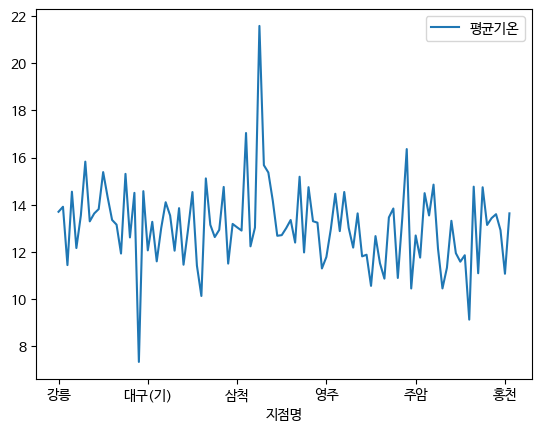

In [69]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot()

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [70]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

평균기온
지점명 년도             
강릉  1994  14.050000
    1995  13.133333
    1996  12.466667
    1997  13.500000
    1998  14.075000
...             ...
흑산도 2019  14.066667
    2020  14.100000
    2021  15.258333
    2022  13.983333
    2023  15.320000

[2536 rows x 1 columns]

<Axes: xlabel='지점명,년도'>

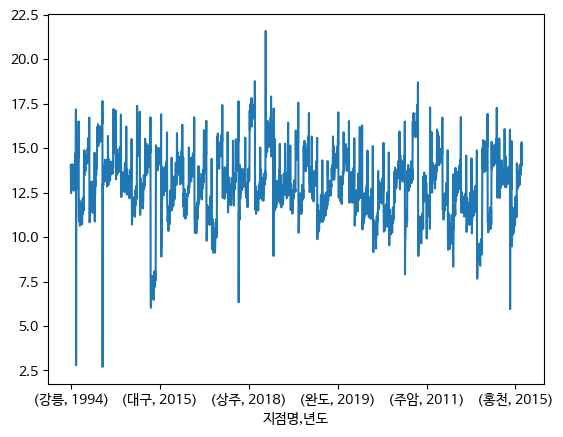

In [71]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

In [72]:
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})

df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max'})

,최고기온
지점명,
강릉,39.3
강진군,37.4
강화,35.8
거제,38.6
거창,37.8
...,...
합천,39.5
해남,37.2
홍성,37.0


- 인텍스를 초기화 하는 방법

In [73]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

,지점명,최고기온
0,강릉,39.3
1,강진군,37.4
2,강화,35.8
3,거제,38.6
4,거창,37.8
...,...,...
97,합천,39.5
98,해남,37.2
99,홍성,37.0
100,홍천,41.0


### [실습문제] : 지점별 년도별 최다 월합강수량?

In [74]:
df.groupby(['지점명','년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
df.groupby(['지점명','년도']).aggregate({'월합강수량':'max'})

월합강수량
지점명 년도         
강릉  1994  306.7
    1995  327.6
    1996  279.0
    1997  239.6
    1998  501.1
...         ...
흑산도 2019  201.7
    2020  305.2
    2021  176.0
    2022  131.4
    2023  590.5

[2536 rows x 1 columns]

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [75]:
df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'최고기온':'max',
                                          '최저기온':'min',
                                          '월합강수량':'max',
                                          '최심적설':'max'})

df2.to_csv(PATH+'제주-년도별-날씨정보.csv', encoding='cp949')
df2

최고기온  최저기온  월합강수량  최심적설
지점명 년도                           
고산  1994  33.1  -0.3  208.2   NaN
    1995  31.4   0.0  341.4   0.9
    1996  33.1  -1.5  216.9   0.4
    1997  31.5  -0.8  197.0   0.3
    1998  32.1  -2.5  218.0   0.6
...        ...   ...    ...   ...
제주  2019  35.4   1.0  610.6   NaN
    2020  36.3  -1.4  400.5   2.1
    2021  34.2  -3.1  493.1   9.2
    2022  37.5  -0.4  265.8   2.7
    2023  37.3  -3.4  273.2   3.7

[134 rows x 4 columns]

#### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록

In [ ]:
# 한 행씩 불러오기  ---->
# for i, row in df_t.iterrows():
#     print(i, row)
#     print(i, row['지점명'], row['최고기온'])

#### 6.가공된 파일 신규 저장하기

In [78]:
# 가공된 데이터 신규 파일로 저장하기
file = PATH+'weather_data2.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

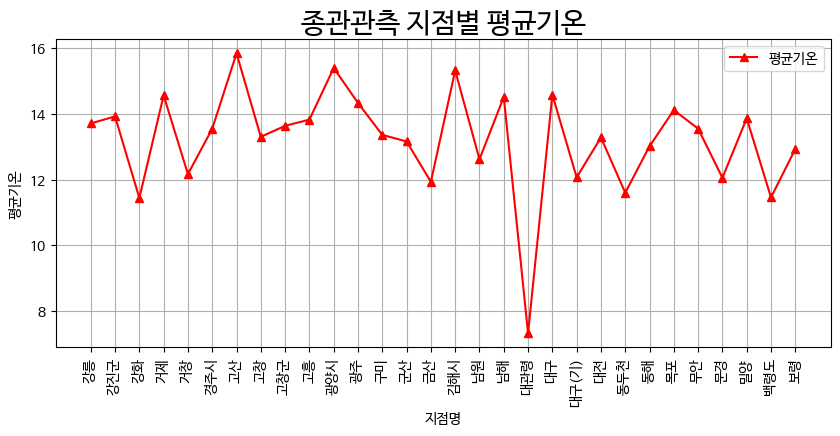

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = PATH+FILE
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.plot(df_, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

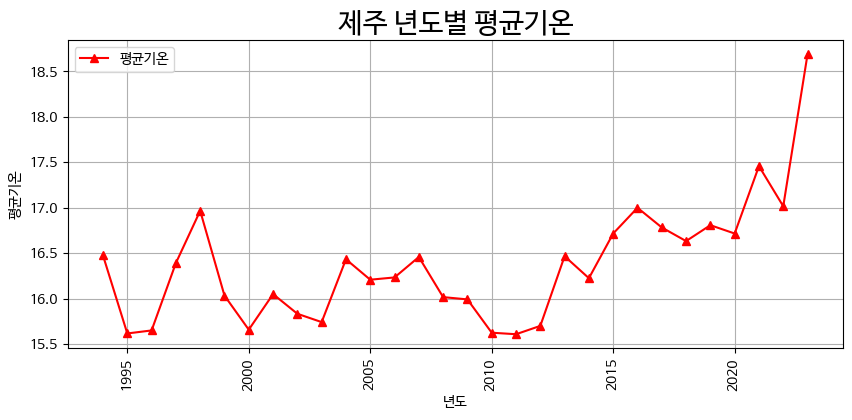

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = PATH+'weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 년도별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

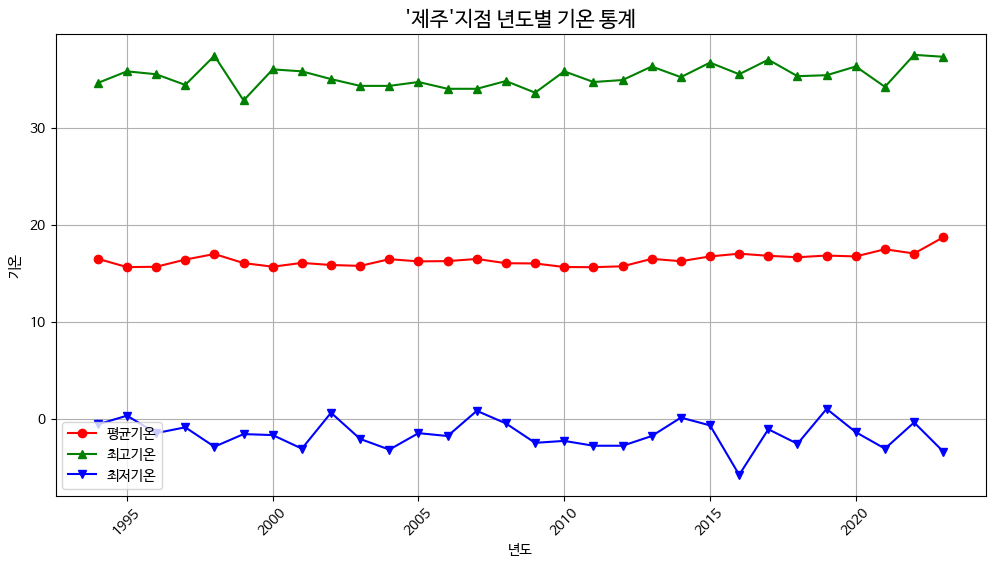

In [81]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


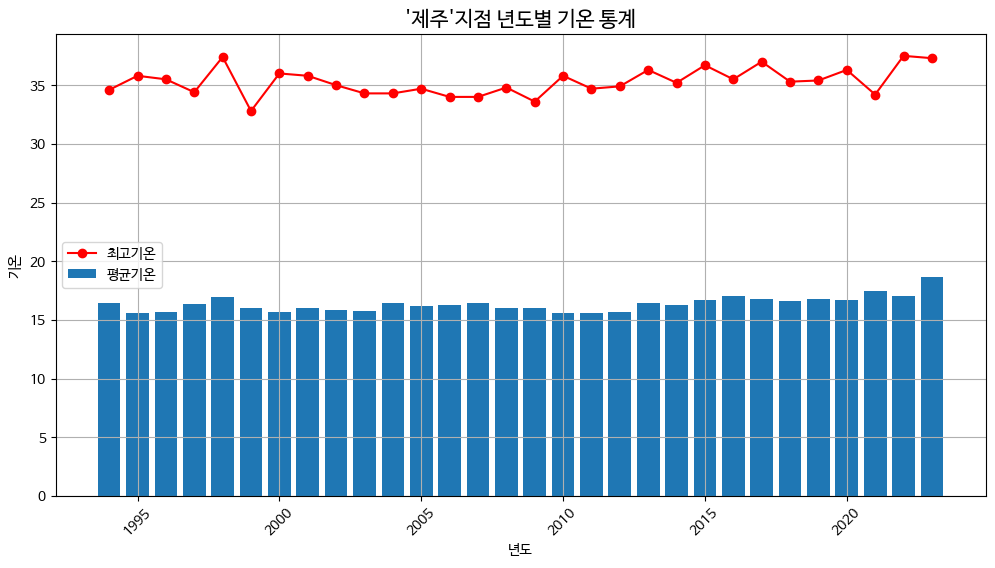

In [82]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

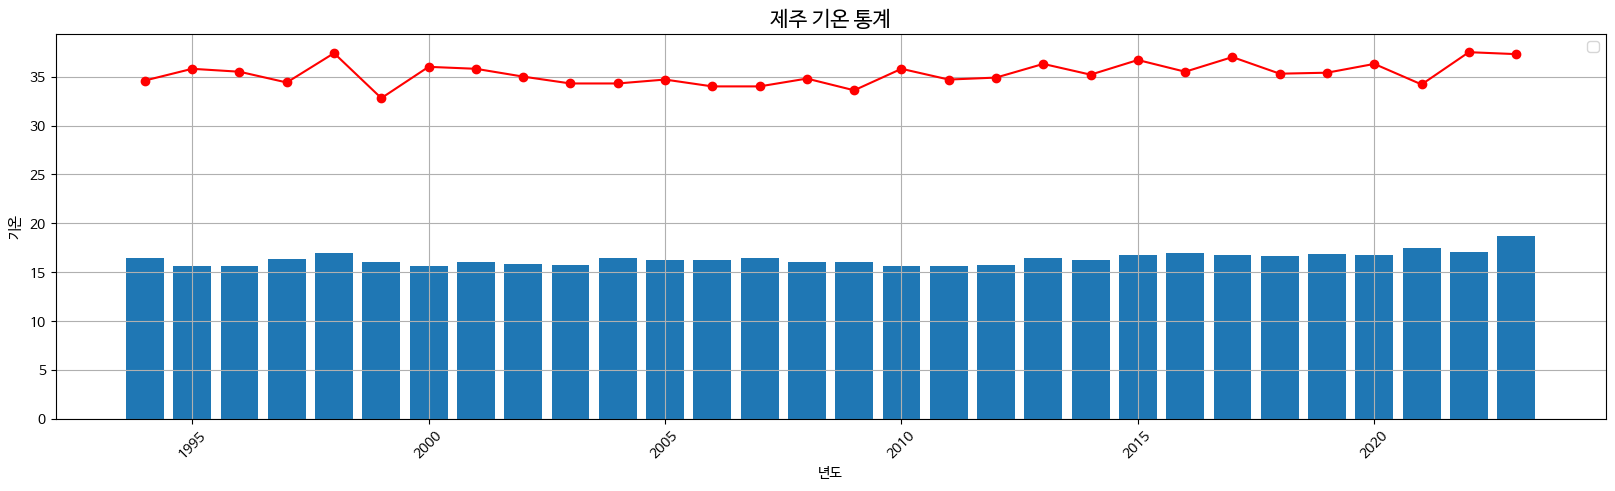

In [83]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

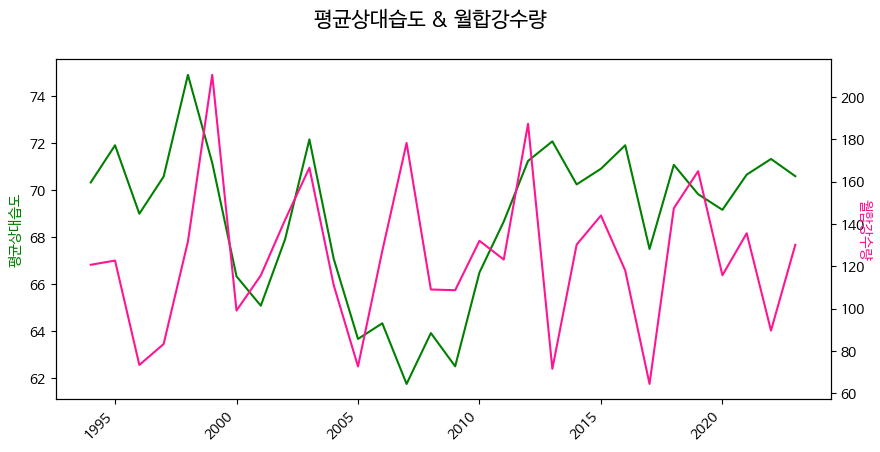

In [84]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.savefig('./graph.png')

plt.show()

-------

---------

끝!